In [1]:
from utils import *

messages = pd.read_csv("data/messages.csv", index_col=0)

# Individual messages with the assistant - quantitative analysis

In [2]:
followUpMessages = messages[(messages.section=='follow_up') & (messages.role=='user')]
followUpMessages.shape

(2265, 19)

In [3]:
messages[(messages.section=='pre_survey_discussion') & (messages.role=='user')].groupby('variant').size()

variant
bfi2s_avatar     82
bfi2s_classic    54
cfq_avatar       84
cfq_classic      49
dtype: int64

## Durations

### Thinking time

In [4]:
followUpMessages.thinking.agg(['mean', 'std', 'median'])

mean       7.515357
std       13.828318
median     4.664522
Name: thinking, dtype: float64

#### Per variant

In [5]:
EDA(followUpMessages, 'variant', 'thinking')

,mean,std
variant,,
bfi2s_avatar,7.210452,13.483425
bfi2s_classic,9.474317,16.327296
cfq_avatar,5.390070,7.054620
cfq_classic,7.783314,15.813477


thinking                                          
                   0.00      0.25      0.50      0.75        1.00
variant                                                          
bfi2s_avatar   0.855675  4.253251  5.149900  6.757753  307.658389
bfi2s_classic  0.000003  2.274811  4.675762  8.813717  162.921342
cfq_avatar     1.640086  3.704600  4.428888  5.599927  134.277390
cfq_classic    0.000003  1.847179  3.858604  8.007252  217.865862

In [6]:
ANALYSISMULTIPLE(followUpMessages, 'variant', 'thinking')

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.001  0.0196  0.1186  0.082  

H(80)=8.352037037037064, p=0.03926977169334038
          1         2         3         4
1  1.000000  0.559811  0.244020  0.051598
2  0.559811  1.000000  0.947030  0.611676
3  0.244020  0.947030  1.000000  0.907767
4  0.051598  0.611676  0.907767  1.000000

H(2265)=74.11221214709462, p=5.615239413504907e-16
              1         2             3             4
1  1.000000e+00  0.000007  4.237240e-07  4.561254e-15
2  7.216894e-06  1.000000  9.246436e-01  1.103214e-02
3  4.237240e-07  0.924644  1.000000e+00  8.493058e-02
4  4.561254e-15  0.011032  8.493058e-02  1.000000e+00

               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    thinking  
No. Observations:      2265       Method:                REML      
No. Groups:            80         Scale:                 175.7511  
Min. group size:       25         Log-Likelihood:        -9109.4730
Max

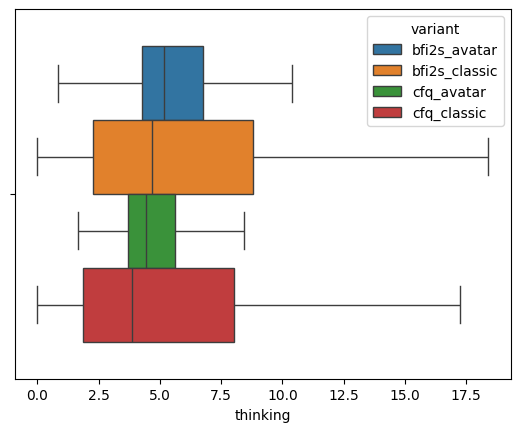

In [7]:
EDAPLOT(followUpMessages, 'variant', 'thinking')

#### Per type

,mean,std
type,,
avatar,6.350289,10.960885
classic,8.671202,16.100433


thinking                                          
             0.00      0.25      0.50      0.75        1.00
type                                                       
avatar   0.855675  3.936771  4.772485  6.150888  307.658389
classic  0.000003  2.057947  4.251901  8.306141  217.865862

['avatar' 'classic']
0.0  0.0005  

avatar: M=4.99, SD=1.3, MED=4.66, IQR=(4.12-5.58)
classic: M=4.73, SD=3.1, MED=4.35, IQR=(2.62-5.68)

median
U(80)=960.0, z=1.54, p=0.1248, r=0.17

median avatar < classic
U(80)=960.0, p=0.9387557189782118

median avatar > classic
U(80)=960.0, p=0.06241777562911162

variance
F(1, 80)=10.21, p=0.002

mean
U(80)=647.0, p=0.14225859268130037

no aggregation
U(2265)=727277.0, p=3.2627709726149013e-08

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: thinking  
No. Observations:  2265    Method:             REML      
No. Groups:        80      Scale:              175.7514  
Min. group size:   25      Log-Likelihood:     -9113.5247
Max. group size:   30      Converged:          Yes       
Mean group size:   28.3                                  
---------------------------------------------------------
                Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------

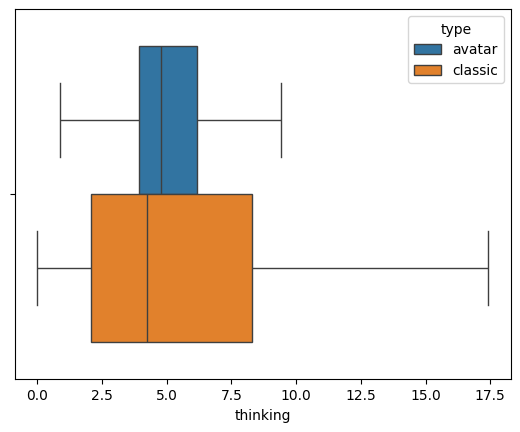

In [8]:
EDA(followUpMessages, 'type', 'thinking')
ANALYSISPAIR(followUpMessages, 'type', 'thinking')
EDAPLOT(followUpMessages, 'type', 'thinking')

#### Per form

In [9]:
EDA(followUpMessages, 'form', 'thinking')

,mean,std
form,,
bfi,8.344283,15.011894
cfq,6.594499,12.323318


thinking                                          
          0.00      0.25      0.50      0.75        1.00
form                                                    
bfi   0.000003  3.579929  4.991302  7.495788  307.658389
cfq   0.000003  3.072763  4.279721  6.175140  217.865862

In [10]:
ANALYSISPAIR(followUpMessages, 'form', 'thinking')

['bfi' 'cfq']
0.0002  0.0101  

bfi: M=5.42, SD=2.75, MED=5.11, IQR=(4.15-5.98)
cfq: M=4.31, SD=1.76, MED=4.21, IQR=(3.49-4.82)

median
U(80)=1049.0, z=2.4, p=0.0168, r=0.27

median bfi < cfq
U(80)=1049.0, p=0.9918206948577482

median bfi > cfq
U(80)=1049.0, p=0.008396875643489747

variance
F(1, 80)=2.0, p=0.1618

mean
U(80)=991.0, p=0.06678961850626576

no aggregation
U(2265)=738910.5, p=1.593558593438013e-10

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: thinking  
No. Observations: 2265    Method:             REML      
No. Groups:       80      Scale:              175.7529  
Min. group size:  25      Log-Likelihood:     -9114.6282
Max. group size:  30      Converged:          Yes       
Mean group size:  28.3                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      8.337    0

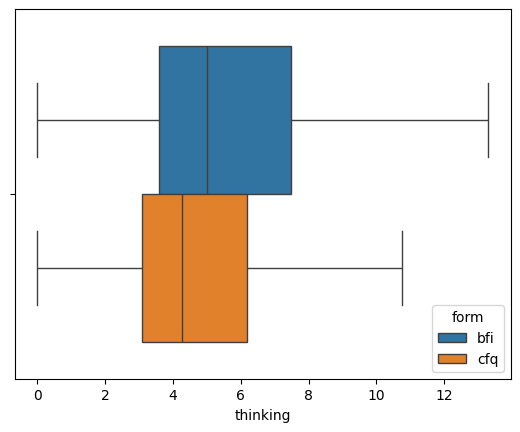

In [11]:
EDAPLOT(followUpMessages, 'form', 'thinking')

#### Per type on BFI

,mean,std
type,,
avatar,7.210452,13.483425
classic,9.474317,16.327296


thinking                                          
             0.00      0.25      0.50      0.75        1.00
type                                                       
avatar   0.855675  4.253251  5.149900  6.757753  307.658389
classic  0.000003  2.274811  4.675762  8.813717  162.921342

['avatar' 'classic']
0.001  0.0196  

avatar: M=5.5, SD=1.48, MED=5.39, IQR=(4.52-5.71)
classic: M=5.34, SD=3.65, MED=4.64, IQR=(2.85-7.38)

median
U(40)=238.0, z=1.03, p=0.3104, r=0.16

median avatar < classic
U(40)=238.0, p=0.8511616227639098

median avatar > classic
U(40)=238.0, p=0.15520112807307912

variance
F(1, 40)=5.87, p=0.0202

mean
U(40)=189.0, p=0.7763905055505131

no aggregation
U(1192)=201170.0, p=7.34134552860121e-05

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: thinking  
No. Observations:  1192    Method:             REML      
No. Groups:        40      Scale:              204.2475  
Min. group size:   27      Log-Likelihood:     -4886.5683
Max. group size:   30      Converged:          Yes       
Mean group size:   29.8                                  
---------------------------------------------------------
                Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------

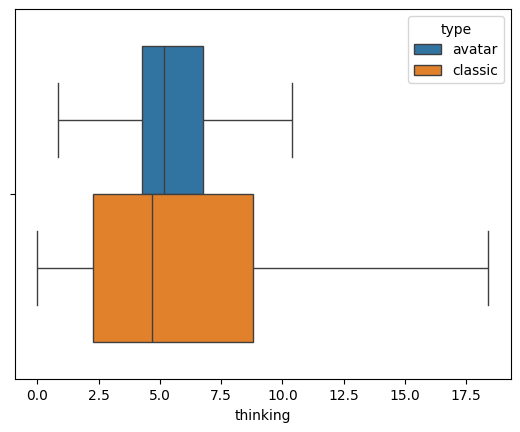

In [12]:
EDA(followUpMessages[followUpMessages.form=='bfi'], 'type', 'thinking')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='bfi'], 'type', 'thinking')
EDAPLOT(followUpMessages[followUpMessages.form=='bfi'], 'type', 'thinking')

#### Per type on CFQ

,mean,std
type,,
avatar,5.390070,7.054620
classic,7.783314,15.813477


thinking                                          
             0.00      0.25      0.50      0.75        1.00
type                                                       
avatar   1.640086  3.704600  4.428888  5.599927  134.277390
classic  0.000003  1.847179  3.858604  8.007252  217.865862

['avatar' 'classic']
0.1186  0.082  

avatar: M=4.48, SD=0.84, MED=4.36, IQR=(3.82-4.87)
classic: M=4.13, SD=2.37, MED=4.06, IQR=(2.39-4.74)

median
U(40)=242.0, z=1.14, p=0.2616, r=0.18

median avatar < classic
U(40)=242.0, p=0.8748516012482441

median avatar > classic
U(40)=242.0, p=0.1308082339392887

variance
F(1, 40)=8.48, p=0.006

mean
U(40)=130.0, p=0.06011064176288861

no aggregation
U(1073)=164530.0, p=4.852508966269873e-05

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: thinking  
No. Observations: 1073    Method:             REML      
No. Groups:       40      Scale:              144.0534  
Min. group size:  25      Log-Likelihood:     -4203.1011
Max. group size:  27      Converged:          Yes       
Mean group size:  26.8                                  
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
In

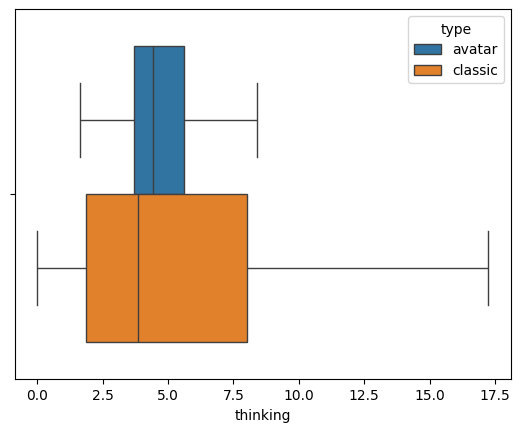

In [13]:
EDA(followUpMessages[followUpMessages.form=='cfq'], 'type', 'thinking')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='cfq'], 'type', 'thinking')
EDAPLOT(followUpMessages[followUpMessages.form=='cfq'], 'type', 'thinking')

### Answering time

In [14]:
followUpMessages.answering.agg(['mean', 'std', 'median'])

mean      22.044678
std       28.550788
median    14.408982
Name: answering, dtype: float64

#### Per variant

In [15]:
EDA(followUpMessages, 'variant', 'answering')

,mean,std
variant,,
bfi2s_avatar,19.317950,21.023785
bfi2s_classic,25.262139,27.383220
cfq_avatar,16.732282,31.897880
cfq_classic,26.735578,32.152696


answering                                             
                   0.00       0.25       0.50       0.75        1.00
variant                                                             
bfi2s_avatar   2.881047   8.982533  13.749528  24.290366  305.833221
bfi2s_classic  0.198963   7.834089  17.967959  33.612599  287.539697
cfq_avatar     3.429559   7.804128  11.252844  16.758646  581.053168
cfq_classic    0.670061  10.353916  18.659647  33.085250  327.774744

In [16]:
ANALYSISMULTIPLE(followUpMessages, 'variant', 'answering')

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.0089  0.0432  0.0048  0.0216  

H(80)=7.767222222222216, p=0.05107564807062004
          1         2         3         4
1  1.000000  0.712669  0.814143  0.512086
2  0.712669  1.000000  0.204079  0.989280
3  0.814143  0.204079  1.000000  0.102200
4  0.512086  0.989280  0.102200  1.000000

H(2265)=96.30409411872006, p=9.683569986530457e-21
          1             2             3             4
1  1.000000  6.088154e-02  2.469360e-05  1.354948e-04
2  0.060882  1.000000e+00  2.662829e-12  3.166221e-01
3  0.000025  2.662829e-12  1.000000e+00  3.336128e-18
4  0.000135  3.166221e-01  3.336128e-18  1.000000e+00

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     answering  
No. Observations:     2265        Method:                 REML       
No. Groups:           80          Scale:                  655.1941   
Min. group size:      25          Log-Likelihood:         -106

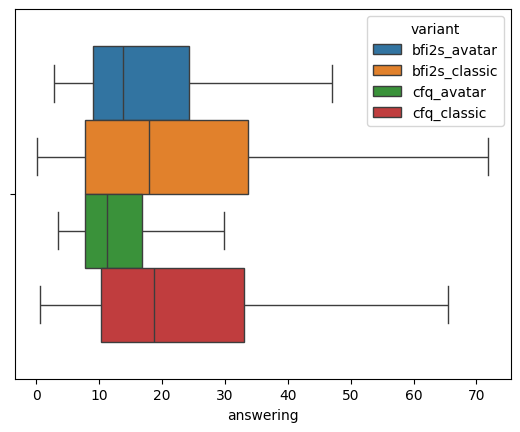

In [17]:
EDAPLOT(followUpMessages, 'variant', 'answering')

#### Per type

In [18]:
EDA(followUpMessages, 'type', 'answering')

,mean,std
type,,
avatar,18.096176,26.738139
classic,25.961925,29.739725


answering                                            
             0.00      0.25       0.50       0.75        1.00
type                                                         
avatar   2.881047  8.324557  12.308134  20.306899  581.053168
classic  0.198963  9.191871  18.407630  33.428551  327.774744

In [19]:
ANALYSISPAIR(followUpMessages, 'type', 'answering')

['avatar' 'classic']
0.0001  0.0039  

avatar: M=15.25, SD=8.44, MED=11.74, IQR=(9.79-19.91)
classic: M=22.02, SD=13.35, MED=18.26, IQR=(12.94-31.77)

median
U(80)=531.0, z=-2.59, p=0.0098, r=0.29

median avatar < classic
U(80)=531.0, p=0.004888154229205809

median avatar > classic
U(80)=531.0, p=0.9952465251537598

variance
F(1, 80)=4.81, p=0.0313

mean
U(80)=524.0, p=0.008025384473813823

no aggregation
U(2265)=512234.0, p=1.1191425174979091e-16

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: answering  
No. Observations:  2265    Method:             REML       
No. Groups:        80      Scale:              655.1937   
Min. group size:   25      Log-Likelihood:     -10633.7935
Max. group size:   30      Converged:          Yes        
Mean group size:   28.3                                   
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------

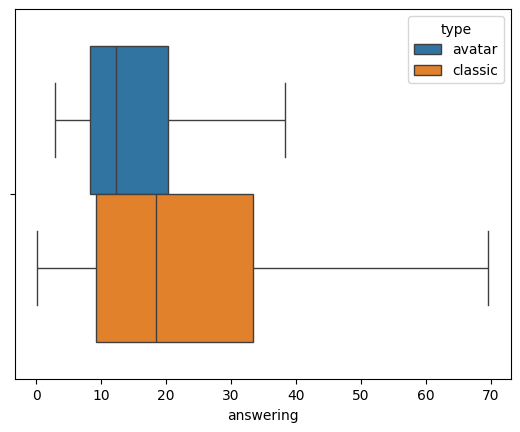

In [20]:
EDAPLOT(followUpMessages, 'type', 'answering')

#### Per form

In [21]:
EDA(followUpMessages, 'form', 'answering')

,mean,std
form,,
bfi,22.295031,24.586968
cfq,21.766560,32.400164


answering                                            
          0.00      0.25       0.50       0.75        1.00
form                                                      
bfi   0.198963  8.531657  15.326643  27.685809  305.833221
cfq   0.670061  8.598242  13.627115  24.112471  581.053168

In [22]:
ANALYSISPAIR(followUpMessages, 'form', 'answering')

['bfi' 'cfq']
0.0004  0.0002  

bfi: M=19.72, SD=12.82, MED=15.04, IQR=(10.23-26.19)
cfq: M=17.55, SD=10.3, MED=14.48, IQR=(10.16-19.82)

median
U(80)=846.0, z=0.44, p=0.6615, r=0.05

median bfi < cfq
U(80)=846.0, p=0.6727236310546527

median bfi > cfq
U(80)=846.0, p=0.3307569525218487

variance
F(1, 80)=1.37, p=0.2454

mean
U(80)=822.0, p=0.8361005722635141

no aggregation
U(2265)=672248.0, p=0.035146946133049674

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: answering  
No. Observations: 2265    Method:             REML       
No. Groups:       80      Scale:              655.1944   
Min. group size:  25      Log-Likelihood:     -10637.2374
Max. group size:  30      Converged:          Yes        
Mean group size:  28.3                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept  

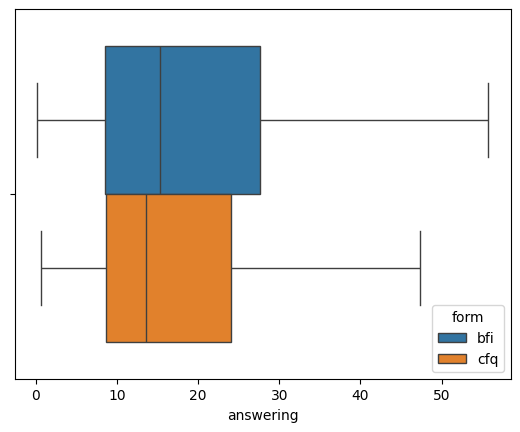

In [23]:
EDAPLOT(followUpMessages, 'form', 'answering')

#### Per type on BFI

,mean,std
type,,
avatar,19.317950,21.023785
classic,25.262139,27.383220


answering                                            
             0.00      0.25       0.50       0.75        1.00
type                                                         
avatar   2.881047  8.982533  13.749528  24.290366  305.833221
classic  0.198963  7.834089  17.967959  33.612599  287.539697

['avatar' 'classic']
0.0089  0.0432  

avatar: M=17.06, SD=9.85, MED=12.46, IQR=(9.83-24.88)
classic: M=22.37, SD=15.03, MED=18.36, IQR=(12.15-28.55)

median
U(40)=159.0, z=-1.11, p=0.2733, r=0.18

median avatar < classic
U(40)=159.0, p=0.13664256009053755

median avatar > classic
U(40)=159.0, p=0.8691917660607114

variance
F(1, 40)=1.79, p=0.1894

mean
U(40)=164.0, p=0.33691523838231996

no aggregation
U(1192)=160515.0, p=0.004025067993116892

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: answering 
No. Observations:   1192    Method:             REML      
No. Groups:         40      Scale:              433.9299  
Min. group size:    27      Log-Likelihood:     -5356.6050
Max. group size:    30      Converged:          Yes       
Mean group size:    29.8                                  
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------

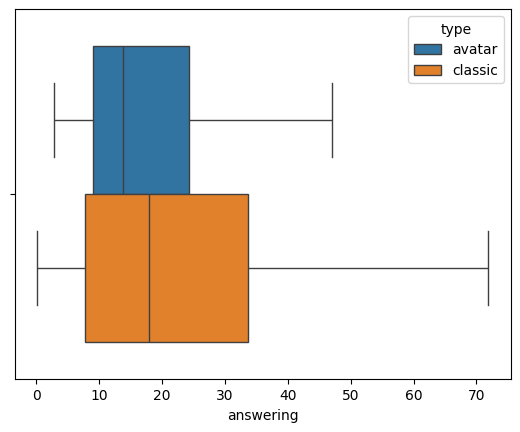

In [24]:
EDA(followUpMessages[followUpMessages.form=='bfi'], 'type', 'answering')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='bfi'], 'type', 'answering')
EDAPLOT(followUpMessages[followUpMessages.form=='bfi'], 'type', 'answering')

#### Per type on CFQ

,mean,std
type,,
avatar,16.732282,31.897880
classic,26.735578,32.152696


answering                                             
             0.00       0.25       0.50       0.75        1.00
type                                                          
avatar   3.429559   7.804128  11.252844  16.758646  581.053168
classic  0.670061  10.353916  18.659647  33.085250  327.774744

['avatar' 'classic']
0.0048  0.0216  

avatar: M=13.43, SD=6.51, MED=11.41, IQR=(9.61-15.05)
classic: M=21.68, SD=11.82, MED=18.26, IQR=(13.56-32.88)

median
U(40)=102.0, z=-2.65, p=0.0084, r=0.42

median avatar < classic
U(40)=102.0, p=0.004177413667822258

median avatar > classic
U(40)=102.0, p=0.9961440974910315

variance
F(1, 40)=3.82, p=0.0579

mean
U(40)=99.0, p=0.00655719264528017

no aggregation
U(1073)=96466.0, p=8.957519303620415e-21

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: answering 
No. Observations:   1073    Method:             REML      
No. Groups:         40      Scale:              901.9705  
Min. group size:    25      Log-Likelihood:     -5199.9036
Max. group size:    27      Converged:          Yes       
Mean group size:    26.8                                  
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------

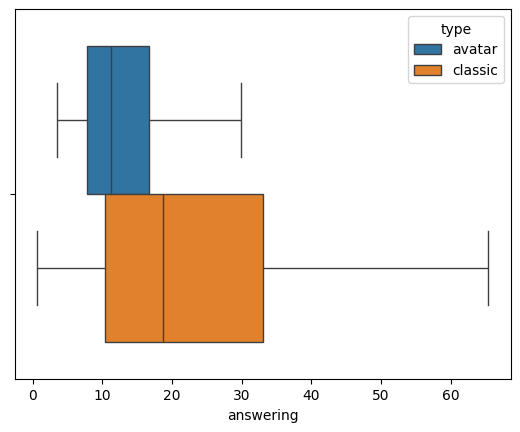

In [25]:
EDA(followUpMessages[followUpMessages.form=='cfq'], 'type', 'answering')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='cfq'], 'type', 'answering')
EDAPLOT(followUpMessages[followUpMessages.form=='cfq'], 'type', 'answering')

### Total time answering in chat

In [26]:
followUpMessages.totalTime.agg(['mean', 'std', 'median'])

mean      29.563418
std       32.742453
median    20.612420
Name: totalTime, dtype: float64

#### Per variant

In [27]:
EDA(followUpMessages, 'variant', 'totalTime')

,mean,std
variant,,
bfi2s_avatar,26.532721,24.562871
bfi2s_classic,34.744988,32.243555
cfq_avatar,22.122352,34.543409
cfq_classic,34.518892,37.304305


totalTime                                             
                   0.00       0.25       0.50       0.75        1.00
variant                                                             
bfi2s_avatar   8.344654  14.745313  20.549371  31.627600  313.480263
bfi2s_classic  1.698866  13.673896  26.031491  45.440473  289.323056
cfq_avatar     7.810241  12.771952  16.148150  22.454745  585.728119
cfq_classic    2.011609  14.379514  23.918940  42.433960  330.026790

In [28]:
ANALYSISMULTIPLE(followUpMessages, 'variant', 'totalTime')

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.0306  0.1702  0.0076  0.0174  

H(80)=8.658333333333331, p=0.034195953655708045
          1         2         3         4
1  1.000000  0.864942  0.419484  0.856529
2  0.864942  1.000000  0.092012  0.999998
3  0.419484  0.092012  1.000000  0.087897
4  0.856529  0.999998  0.087897  1.000000

H(2265)=110.20412821185528, p=9.917566959342218e-24
              1             2             3             4
1  1.000000e+00  4.802272e-02  1.557139e-09  1.078566e-01
2  4.802272e-02  1.000000e+00  6.712195e-19  9.945903e-01
3  1.557139e-09  6.712195e-19  1.000000e+00  5.676812e-17
4  1.078566e-01  9.945903e-01  5.676812e-17  1.000000e+00

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     totalTime  
No. Observations:     2265        Method:                 REML       
No. Groups:           80          Scale:                  867.5130   
Min. group size:      25          Log-Li

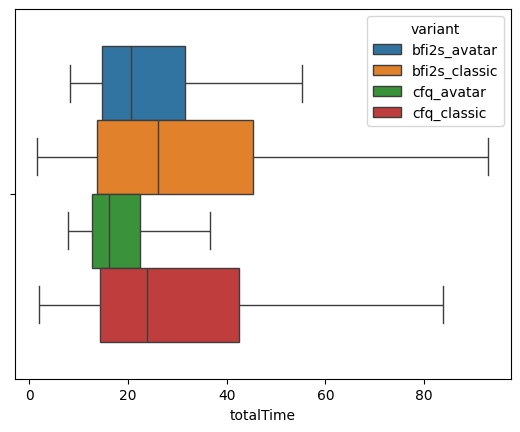

In [29]:
EDAPLOT(followUpMessages, 'variant', 'totalTime')

#### Per type

In [30]:
EDA(followUpMessages, 'type', 'totalTime')

,mean,std
type,,
avatar,24.448744,29.767764
classic,34.637608,34.723789


totalTime                                             
             0.00       0.25       0.50       0.75        1.00
type                                                          
avatar   7.810241  13.521635  18.267072  27.069865  585.728119
classic  1.698866  14.001610  25.157605  44.565846  330.026790

In [31]:
ANALYSISPAIR(followUpMessages, 'type', 'totalTime')

['avatar' 'classic']
0.0003  0.0096  

avatar: M=20.79, SD=8.48, MED=17.57, IQR=(15.08-25.0)
classic: M=28.8, SD=15.78, MED=22.64, IQR=(17.26-38.6)

median
U(80)=549.0, z=-2.42, p=0.0159, r=0.27

median avatar < classic
U(80)=549.0, p=0.007966703270912534

median avatar > classic
U(80)=549.0, p=0.9922410242037304

variance
F(1, 80)=7.98, p=0.006

mean
U(80)=507.0, p=0.004884063010547593

no aggregation
U(2265)=514655.0, p=4.0908718416585347e-16

           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: totalTime  
No. Observations:   2265    Method:             REML       
No. Groups:         80      Scale:              867.5154   
Min. group size:    25      Log-Likelihood:     -10949.2890
Max. group size:    30      Converged:          Yes        
Mean group size:    28.3                                   
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------

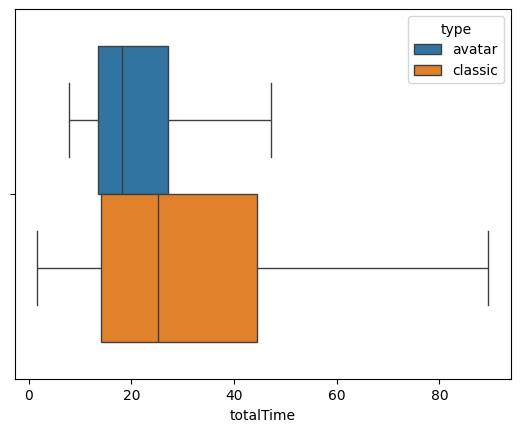

In [32]:
EDAPLOT(followUpMessages, 'type', 'totalTime')

#### Per form

In [33]:
EDA(followUpMessages, 'form', 'totalTime')

,mean,std
form,,
bfi,30.645744,28.948951
cfq,28.361058,36.473606


totalTime                                             
          0.00       0.25       0.50       0.75        1.00
form                                                       
bfi   1.698866  14.442769  22.737619  37.190970  313.480263
cfq   2.011609  13.055866  18.951549  30.531148  585.728119

In [34]:
ANALYSISPAIR(followUpMessages, 'form', 'totalTime')

['bfi' 'cfq']
0.0025  0.0  

bfi: M=26.19, SD=13.56, MED=22.92, IQR=(16.39-32.85)
cfq: M=23.4, SD=12.89, MED=19.43, IQR=(14.82-25.69)

median
U(80)=922.0, z=1.17, p=0.2423, r=0.13

median bfi < cfq
U(80)=922.0, p=0.8807524844714979

median bfi > cfq
U(80)=922.0, p=0.12117476419422651

variance
F(1, 80)=0.62, p=0.4344

mean
U(80)=924.0, p=0.23468400637067188

no aggregation
U(2265)=714917.0, p=1.2206988342032433e-06

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: totalTime  
No. Observations: 2265    Method:             REML       
No. Groups:       80      Scale:              867.5067   
Min. group size:  25      Log-Likelihood:     -10953.6329
Max. group size:  30      Converged:          Yes        
Mean group size:  28.3                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept 

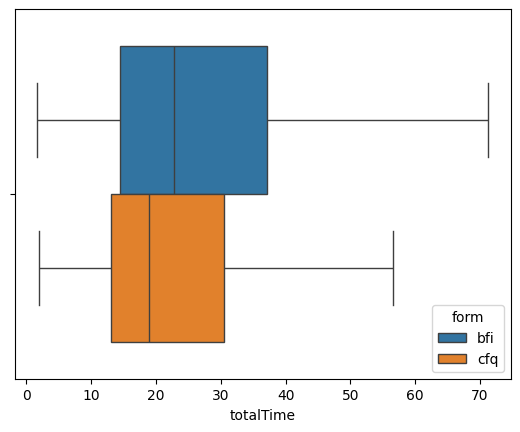

In [35]:
EDAPLOT(followUpMessages, 'form', 'totalTime')

#### Per type on BFI

,mean,std
type,,
avatar,26.532721,24.562871
classic,34.744988,32.243555


totalTime                                             
             0.00       0.25       0.50       0.75        1.00
type                                                          
avatar   8.344654  14.745313  20.549371  31.627600  313.480263
classic  1.698866  13.673896  26.031491  45.440473  289.323056

['avatar' 'classic']
0.0306  0.1702  

avatar: M=23.3, SD=9.63, MED=19.01, IQR=(16.27-30.24)
classic: M=29.09, SD=16.34, MED=27.51, IQR=(17.06-36.52)

median
U(40)=159.0, z=-1.11, p=0.2733, r=0.18

median avatar < classic
U(40)=159.0, p=0.13664256009053755

median avatar > classic
U(40)=159.0, p=0.8691917660607114

variance
F(1, 40)=4.1, p=0.0498

mean
U(40)=143.0, p=0.12643061736676814

no aggregation
U(1192)=157287.0, p=0.0006276203080699265

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: totalTime 
No. Observations:   1192    Method:             REML      
No. Groups:         40      Scale:              648.9414  
Min. group size:    27      Log-Likelihood:     -5590.2447
Max. group size:    30      Converged:          Yes       
Mean group size:    29.8                                  
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------

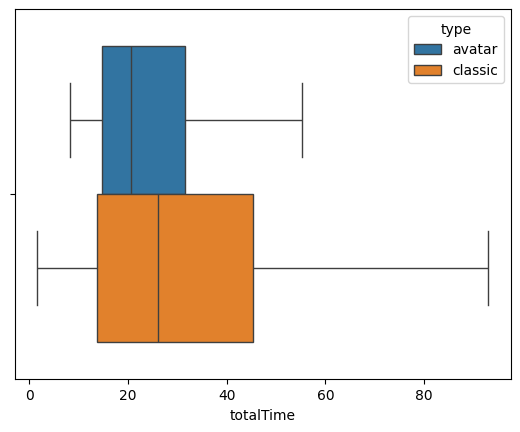

In [36]:
EDA(followUpMessages[followUpMessages.form=='bfi'], 'type', 'totalTime')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='bfi'], 'type', 'totalTime')
EDAPLOT(followUpMessages[followUpMessages.form=='bfi'], 'type', 'totalTime')

#### Per type on CFQ

,mean,std
type,,
avatar,22.122352,34.543409
classic,34.518892,37.304305


totalTime                                            
             0.00       0.25      0.50       0.75        1.00
type                                                         
avatar   7.810241  12.771952  16.14815  22.454745  585.728119
classic  2.011609  14.379514  23.91894  42.433960  330.026790

['avatar' 'classic']
0.0076  0.0174  

avatar: M=18.29, SD=6.46, MED=16.57, IQR=(13.94-20.59)
classic: M=28.51, SD=15.62, MED=22.58, IQR=(18.89-42.99)

median
U(40)=108.0, z=-2.49, p=0.0133, r=0.39

median avatar < classic
U(40)=108.0, p=0.006660258011799983

median avatar > classic
U(40)=108.0, p=0.9938276271206914

variance
F(1, 40)=4.97, p=0.0318

mean
U(40)=104.0, p=0.009786486727077012

no aggregation
U(1073)=100567.0, p=1.3458583028408209e-17

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: totalTime 
No. Observations:   1073    Method:             REML      
No. Groups:         40      Scale:              1111.2340 
Min. group size:    25      Log-Likelihood:     -5314.3302
Max. group size:    27      Converged:          Yes       
Mean group size:    26.8                                  
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------

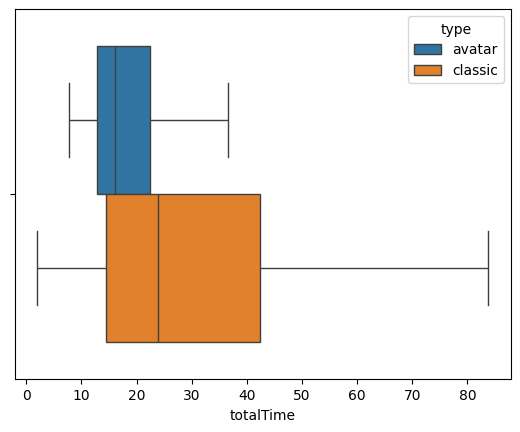

In [37]:
EDA(followUpMessages[followUpMessages.form=='cfq'], 'type', 'totalTime')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='cfq'], 'type', 'totalTime')
EDAPLOT(followUpMessages[followUpMessages.form=='cfq'], 'type', 'totalTime')

## Word count

### Per variant

,mean,std
variant,,
bfi2s_avatar,35.494118,33.274866
bfi2s_classic,15.061977,12.177567
cfq_avatar,26.457786,24.941296
cfq_classic,17.133333,11.507068


wordCount                          
                   0.00  0.25  0.50   0.75   1.00
variant                                          
bfi2s_avatar        1.0  12.0  25.0  47.00  187.0
bfi2s_classic       1.0   6.0  12.0  22.00   66.0
cfq_avatar          1.0  10.0  18.0  34.00  163.0
cfq_classic         1.0   9.0  15.0  23.25   66.0

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.0078  0.2343  0.0017  0.2067  

H(80)=13.989119718309848, p=0.0029200001678696278
          1         2         3         4
1  1.000000  0.011997  0.888458  0.091646
2  0.011997  1.000000  0.097352  0.898264
3  0.888458  0.097352  1.000000  0.385750
4  0.091646  0.898264  0.385750  1.000000

H(2265)=216.57304419121718, p=1.105337353214953e-46
              1             2             3             4
1  1.000000e+00  1.115160e-40  1.842563e-04  7.408918e-21
2  1.115160e-40  1.000000e+00  4.531112e-17  5.514024e-03
3  1.842563e-04  4.531112e-17  1.000000e+00  4.963890e-06
4  7.408918e-21  5.514024e-03  4.963890e-06  1.000000e+00

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     wordCount 
No. Observations:       2265        Method:                 REML      
No. Groups:             80          Scale:                  243.9152  
Min. group size:        25         

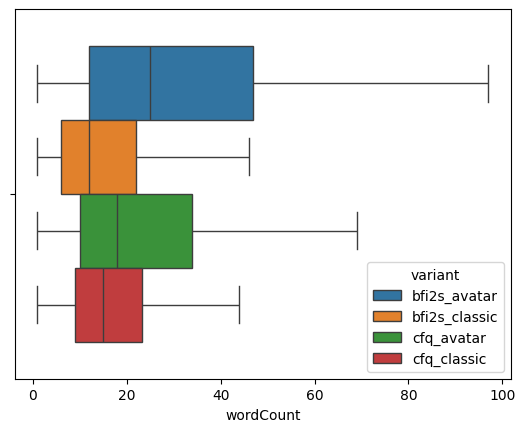

In [38]:
EDA(followUpMessages, 'variant', 'wordCount')
ANALYSISMULTIPLE(followUpMessages, 'variant', 'wordCount')
EDAPLOT(followUpMessages, 'variant', 'wordCount')

### Per type

,mean,std
type,,
avatar,31.224291,29.959811
classic,16.045734,11.903723


wordCount                         
             0.00  0.25  0.50  0.75   1.00
type                                      
avatar        1.0  11.0  22.0  42.0  187.0
classic       1.0   7.0  14.0  22.0   66.0

['avatar' 'classic']
0.0001  0.3791  

avatar: M=29.32, SD=22.24, MED=19.25, IQR=(15.38-41.5)
classic: M=14.3, SD=6.89, MED=14.25, IQR=(9.88-19.0)

median
U(80)=1171.0, z=3.57, p=0.0004, r=0.4

median avatar < classic
U(80)=1171.0, p=0.9998264038804939

median avatar > classic
U(80)=1171.0, p=0.0001801001817788202

variance
F(1, 80)=12.7, p=0.0006

mean
U(80)=1139.5, p=0.0011061035890810487

no aggregation
U(2265)=852363.5, p=6.120259142472827e-42

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  wordCount 
No. Observations:   2265     Method:              REML      
No. Groups:         80       Scale:               243.9153  
Min. group size:    25       Log-Likelihood:      -9574.6308
Max. group size:    30       Converged:           Yes       
Mean group size:    28.3                                    
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------

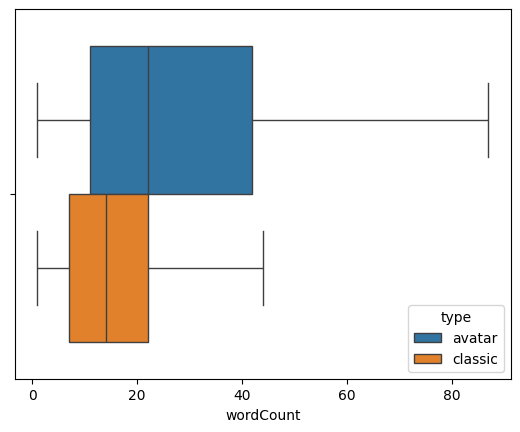

In [39]:
EDA(followUpMessages, 'type', 'wordCount')
ANALYSISPAIR(followUpMessages, 'type', 'wordCount')
EDAPLOT(followUpMessages, 'type', 'wordCount')

### Per form

,mean,std
form,,
bfi,25.260906,27.034758
cfq,21.765144,19.926002


wordCount                        
          0.00 0.25  0.50  0.75   1.00
form                                  
bfi        1.0  8.0  17.0  32.0  187.0
cfq        1.0  9.0  16.0  28.0  163.0

['bfi' 'cfq']
0.0  0.0  

bfi: M=23.18, SD=20.65, MED=16.25, IQR=(11.62-23.62)
cfq: M=20.45, SD=15.09, MED=16.0, IQR=(11.75-25.25)

median
U(80)=802.0, z=0.02, p=0.9885, r=0.0

median bfi < cfq
U(80)=802.0, p=0.5096028883042372

median bfi > cfq
U(80)=802.0, p=0.49423791086170105

variance
F(1, 80)=1.39, p=0.2422

mean
U(80)=827.0, p=0.7987247495667829

no aggregation
U(2265)=649711.0, p=0.5113696693436889

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: wordCount 
No. Observations: 2265    Method:             REML      
No. Groups:       80      Scale:              243.9148  
Min. group size:  25      Log-Likelihood:     -9581.4021
Max. group size:  30      Converged:          Yes       
Mean group size:  28.3                                  
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------
Intercept    25.308    2.928 

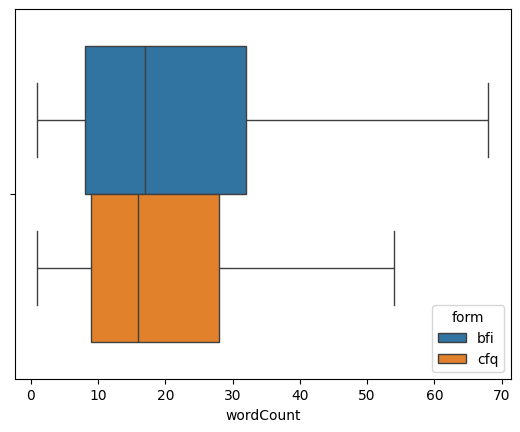

In [40]:
EDA(followUpMessages, 'form', 'wordCount')
ANALYSISPAIR(followUpMessages, 'form', 'wordCount')
EDAPLOT(followUpMessages, 'form', 'wordCount')

### In time

In [41]:
temp = pd.DataFrame(columns=['id', 'variant'] + [x for x in range(30)])

def pad_to_x(arr, x, val):
    if arr.size < x:
        return np.pad(arr, (0, x - arr.size), constant_values=val)
    else:
        return arr

for i, g in messages[(messages.role=='user') & (messages.section=='follow_up')].groupby('respondentID'):
    row = []
    for j, gg in g.groupby('chatID'):
        row.append(pad_to_x(gg.wordCount.values, 3, 0))
    row = np.array([item for sublist in row for item in sublist], dtype=float)
    row = pad_to_x(row, 30, np.nan)
    temp.loc[len(temp)] = [i, g.variant.unique()[0]] + list(row)

In [42]:
temp.iloc[:, [x for x in range(2, 31, 3)]].median().mean()

np.float64(18.5)

In [43]:
temp.iloc[:, [x + 1 for x in range(2, 31, 3)]].median().mean()

np.float64(16.9)

In [44]:
temp.iloc[:, [x + 2 for x in range(2, 31, 3)]].median().mean()

np.float64(14.35)

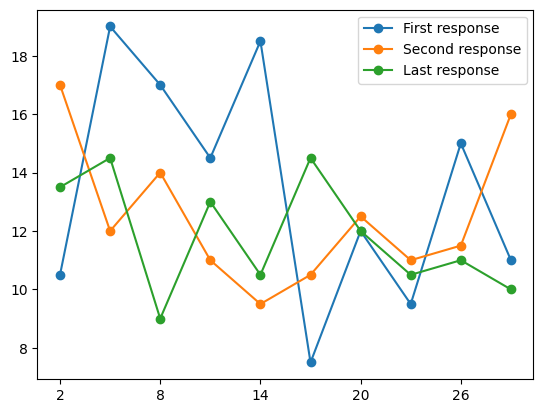

In [45]:
temp[(temp.variant=='bfi2s_classic')].iloc[:, [x for x in range(2, 31, 3)]].median().plot(marker='o', label='First response')
temp[(temp.variant=='bfi2s_classic')].iloc[:, [x + 1 for x in range(2, 31, 3)]].median().plot(marker='o', label='Second response')
temp[(temp.variant=='bfi2s_classic')].iloc[:, [x + 2 for x in range(2, 31, 3)]].median().plot(marker='o', label='Last response')
plt.legend()

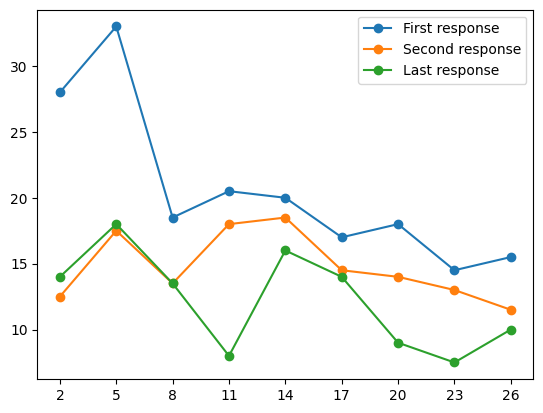

In [46]:
temp[(temp.variant=='cfq_classic')].iloc[:, [x for x in range(2, 31, 3)]].median().plot(marker='o', label='First response')
temp[(temp.variant=='cfq_classic')].iloc[:, [x + 1 for x in range(2, 31, 3)]].median().plot(marker='o', label='Second response')
temp[(temp.variant=='cfq_classic')].iloc[:, [x + 2 for x in range(2, 31, 3)]].median().plot(marker='o', label='Last response')
plt.legend()

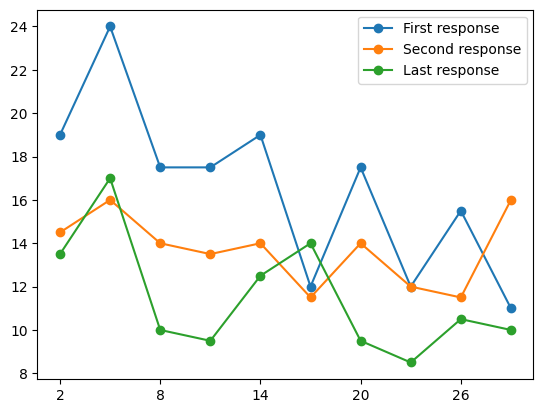

In [47]:
temp[(temp.variant=='bfi2s_classic') | (temp.variant=='cfq_classic')].iloc[:, [x for x in range(2, 31, 3)]].median().plot(marker='o', label='First response')
temp[(temp.variant=='bfi2s_classic') | (temp.variant=='cfq_classic')].iloc[:, [x + 1 for x in range(2, 31, 3)]].median().plot(marker='o', label='Second response')
temp[(temp.variant=='bfi2s_classic') | (temp.variant=='cfq_classic')].iloc[:, [x + 2 for x in range(2, 31, 3)]].median().plot(marker='o', label='Last response')
plt.legend()

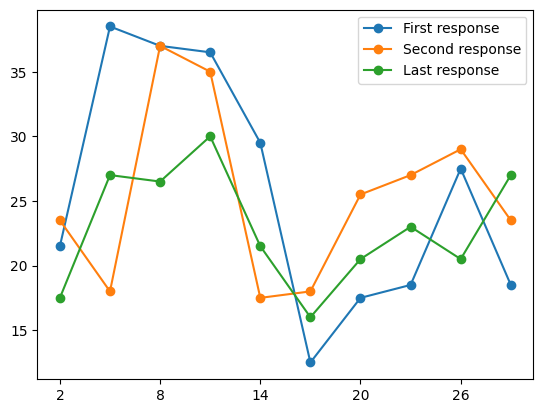

In [48]:
temp[(temp.variant=='bfi2s_avatar')].iloc[:, [x for x in range(2, 31, 3)]].median().plot(marker='o', label='First response')
temp[(temp.variant=='bfi2s_avatar')].iloc[:, [x + 1 for x in range(2, 31, 3)]].median().plot(marker='o', label='Second response')
temp[(temp.variant=='bfi2s_avatar')].iloc[:, [x + 2 for x in range(2, 31, 3)]].median().plot(marker='o', label='Last response')
plt.legend()

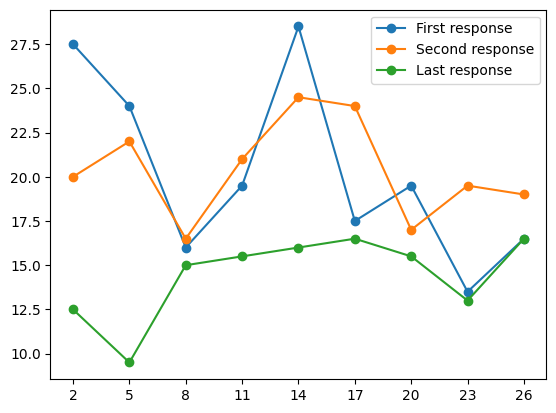

In [49]:
temp[(temp.variant=='cfq_avatar')].iloc[:, [x for x in range(2, 31, 3)]].median().plot(marker='o', label='First response')
temp[(temp.variant=='cfq_avatar')].iloc[:, [x + 1 for x in range(2, 31, 3)]].median().plot(marker='o', label='Second response')
temp[(temp.variant=='cfq_avatar')].iloc[:, [x + 2 for x in range(2, 31, 3)]].median().plot(marker='o', label='Last response')
plt.legend()

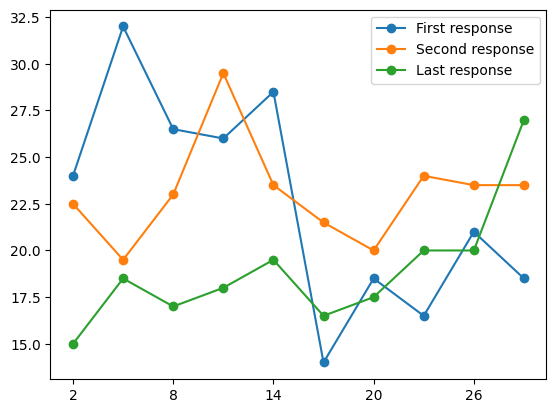

In [50]:
temp[(temp.variant=='bfi2s_avatar') | (temp.variant=='cfq_avatar')].iloc[:, [x for x in range(2, 31, 3)]].median().plot(marker='o', label='First response')
temp[(temp.variant=='bfi2s_avatar') | (temp.variant=='cfq_avatar')].iloc[:, [x + 1 for x in range(2, 31, 3)]].median().plot(marker='o', label='Second response')
temp[(temp.variant=='bfi2s_avatar') | (temp.variant=='cfq_avatar')].iloc[:, [x + 2 for x in range(2, 31, 3)]].median().plot(marker='o', label='Last response')
plt.legend()

### Per type on BFI

,mean,std
type,,
avatar,35.494118,33.274866
classic,15.061977,12.177567


wordCount                         
             0.00  0.25  0.50  0.75   1.00
type                                      
avatar        1.0  12.0  25.0  47.0  187.0
classic       1.0   6.0  12.0  22.0   66.0

['avatar' 'classic']
0.0078  0.2343  

avatar: M=33.05, SD=24.79, MED=21.5, IQR=(15.5-44.5)
classic: M=13.3, SD=7.44, MED=13.0, IQR=(5.0-19.25)

median
U(40)=311.0, z=3.0, p=0.0028, r=0.47

median avatar < classic
U(40)=311.0, p=0.9987327927163687

median avatar > classic
U(40)=311.0, p=0.0013852185800319636

variance
F(1, 40)=7.48, p=0.0094

mean
U(40)=309.0, p=0.003336179304756405

no aggregation
U(1192)=255932.5, p=1.0809308364034032e-39

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  wordCount 
No. Observations:   1192     Method:              REML      
No. Groups:         40       Scale:               302.3833  
Min. group size:    27       Log-Likelihood:      -5160.9386
Max. group size:    30       Converged:           Yes       
Mean group size:    29.8                                    
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------

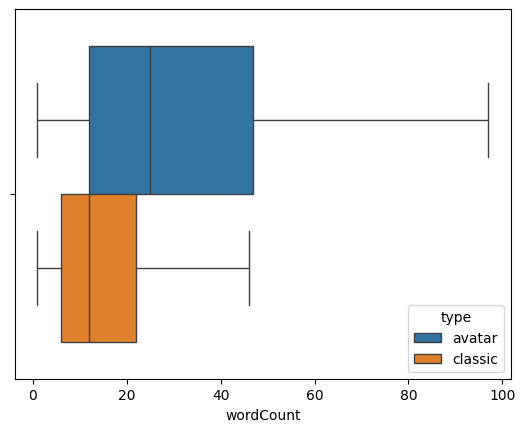

In [51]:
EDA(followUpMessages[followUpMessages.form=='bfi'], 'type', 'wordCount')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='bfi'], 'type', 'wordCount')
EDAPLOT(followUpMessages[followUpMessages.form=='bfi'], 'type', 'wordCount')

### Per type on CFQ

,mean,std
type,,
avatar,26.457786,24.941296
classic,17.133333,11.507068


wordCount                          
             0.00  0.25  0.50   0.75   1.00
type                                       
avatar        1.0  10.0  18.0  34.00  163.0
classic       1.0   9.0  15.0  23.25   66.0

['avatar' 'classic']
0.0017  0.2067  

avatar: M=25.6, SD=19.28, MED=16.5, IQR=(14.75-30.5)
classic: M=15.3, SD=6.33, MED=15.0, IQR=(11.0-18.25)

median
U(40)=268.0, z=1.84, p=0.067, r=0.29

median avatar < classic
U(40)=268.0, p=0.9684647352191743

median avatar > classic
U(40)=268.0, p=0.033508519412767994

variance
F(1, 40)=5.04, p=0.0306

mean
U(40)=250.5, p=0.17619371485201418

no aggregation
U(1073)=171442.0, p=5.7378404731303374e-08

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  wordCount 
No. Observations:   1073     Method:              REML      
No. Groups:         40       Scale:               178.7188  
Min. group size:    25       Log-Likelihood:      -4368.8949
Max. group size:    27       Converged:           Yes       
Mean group size:    26.8                                    
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------

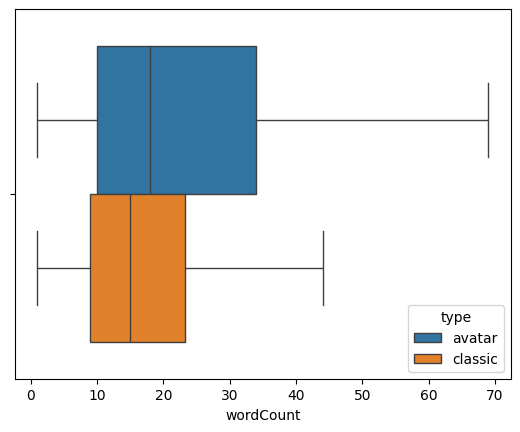

In [52]:
EDA(followUpMessages[followUpMessages.form=='cfq'], 'type', 'wordCount')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='cfq'], 'type', 'wordCount')
EDAPLOT(followUpMessages[followUpMessages.form=='cfq'], 'type', 'wordCount')

### Talkative respondents

In [53]:
medians = followUpMessages[followUpMessages.type=='avatar'].groupby(['respondentID']).wordCount.median().sort_values()

In [54]:
print(medians[medians <= medians.median()].index.tolist())

[11, 129, 75, 108, 142, 130, 34, 31, 140, 138, 95, 105, 98, 70, 71, 72, 120, 77, 58, 160]


In [55]:
print(medians[medians > medians.median()].index.tolist())

[136, 125, 69, 117, 147, 80, 158, 100, 145, 114, 104, 123, 93, 156, 99, 92, 106, 109, 76, 148]


In [56]:
medians = followUpMessages[followUpMessages.type=='classic'].groupby(['respondentID']).wordCount.median().sort_values()

In [57]:
print(medians[medians <= medians.median()].index.tolist())

[45, 90, 9, 88, 87, 65, 97, 53, 94, 63, 113, 35, 49, 54, 102, 161, 39, 51, 135, 121]


In [58]:
print(medians[medians > medians.median()].index.tolist())

[127, 126, 116, 33, 119, 134, 42, 137, 47, 101, 128, 122, 124, 56, 157, 141, 115, 103, 8, 50]


### Slope difference

In [59]:
temp = messages[(messages.section=='follow_up') & (messages.role=='user')][['type', 'informativeness', 'answering']]
temp['log_informativeness'] = np.log1p(temp['informativeness'])
temp['log_answering'] = np.log1p(temp['answering'])
model = smf.ols('log_informativeness ~ log_answering * type', data=temp).fit()

# Robust SEs
robust_model = model.get_robustcov_results(cov_type='HC3')
print(robust_model.summary())

                             OLS Regression Results                            
Dep. Variable:     log_informativeness   R-squared:                       0.629
Model:                             OLS   Adj. R-squared:                  0.629
Method:                  Least Squares   F-statistic:                     340.4
Date:                 Mon, 30 Jun 2025   Prob (F-statistic):          2.26e-182
Time:                         14:33:50   Log-Likelihood:                -1932.2
No. Observations:                 2265   AIC:                             3872.
Df Residuals:                     2261   BIC:                             3895.
Df Model:                            3                                         
Covariance Type:                   HC3                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Inte

## Character count

### Per variant

,mean,std
variant,,
bfi2s_avatar,181.796639,170.404858
bfi2s_classic,77.345059,62.474356
cfq_avatar,134.347092,126.899172
cfq_classic,85.468519,56.130587


charCount                           
                   0.00  0.25   0.50   0.75   1.00
variant                                           
bfi2s_avatar        1.0  62.5  126.0  244.5  963.0
bfi2s_classic       2.0  30.0   63.0  110.0  376.0
cfq_avatar          3.0  49.0   94.0  172.0  835.0
cfq_classic         2.0  43.0   75.0  115.0  308.0

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.011  0.3885  0.0038  0.2167  

H(80)=13.967652264628702, p=0.002949515857815684
          1         2         3         4
1  1.000000  0.014675  0.892377  0.072851
2  0.014675  1.000000  0.109970  0.947848
3  0.892377  0.109970  1.000000  0.328878
4  0.072851  0.947848  0.328878  1.000000

H(2265)=215.09722352562537, p=2.3040611718163373e-46
              1             2             3             4
1  1.000000e+00  1.143810e-39  1.565165e-04  4.218277e-22
2  1.143810e-39  1.000000e+00  2.686158e-16  2.242038e-02
3  1.565165e-04  2.686158e-16  1.000000e+00  1.397637e-06
4  4.218277e-22  2.242038e-02  1.397637e-06  1.000000e+00

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      charCount  
No. Observations:      2265         Method:                  REML       
No. Groups:            80           Scale:                   6258.4674  
Min. group size:       25    

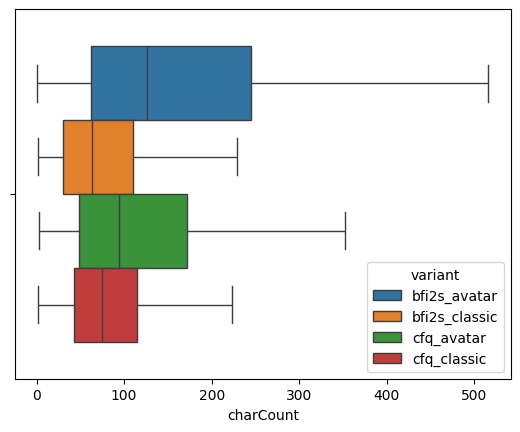

In [60]:
EDA(followUpMessages, 'variant', 'charCount')
ANALYSISMULTIPLE(followUpMessages, 'variant', 'charCount')
EDAPLOT(followUpMessages, 'variant', 'charCount')

### Per type

,mean,std
type,,
avatar,159.375887,153.192772
classic,81.203166,59.658078


charCount                            
             0.00  0.25   0.50    0.75   1.00
type                                         
avatar        1.0  56.0  110.0  211.25  963.0
classic       2.0  36.0   69.0  111.00  376.0

['avatar' 'classic']
0.0001  0.5712  

avatar: M=149.31, SD=110.0, MED=106.0, IQR=(78.5-205.88)
classic: M=73.51, SD=35.12, MED=75.25, IQR=(49.25-93.25)

median
U(80)=1174.5, z=3.6, p=0.0003, r=0.4

median avatar < classic
U(80)=1174.5, p=0.9998460780390571

median avatar > classic
U(80)=1174.5, p=0.00015973055437368155

variance
F(1, 80)=13.87, p=0.0004

mean
U(80)=1141.0, p=0.0010511616738341485

no aggregation
U(2265)=853129.5, p=3.3096122558675294e-42

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   charCount  
No. Observations:   2265      Method:               REML       
No. Groups:         80        Scale:                6258.4731  
Min. group size:    25        Log-Likelihood:       -13247.1423
Max. group size:    30        Converged:            Yes        
Mean group size:    28.3                                       
---------------------------------------------------------------
                 Coef.   Std.Err.   z   

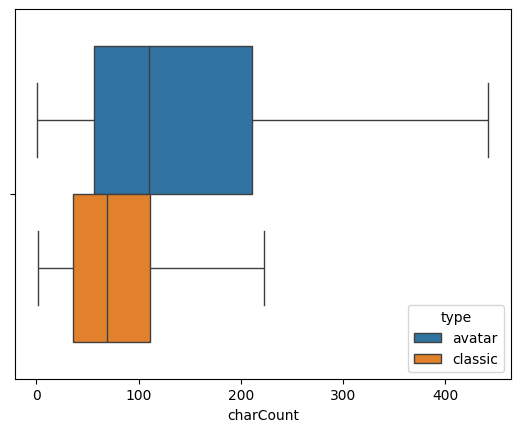

In [61]:
EDA(followUpMessages, 'type', 'charCount')
ANALYSISPAIR(followUpMessages, 'type', 'charCount')
EDAPLOT(followUpMessages, 'type', 'charCount')

### Per form

,mean,std
form,,
bfi,129.483221,138.438842
cfq,109.748369,100.864075


charCount                           
          0.00  0.25  0.50    0.75   1.00
form                                     
bfi        1.0  41.0  86.5  164.25  963.0
cfq        2.0  46.0  82.0  140.00  835.0

['bfi' 'cfq']
0.0  0.0  

bfi: M=118.8, SD=103.29, MED=83.5, IQR=(58.38-126.62)
cfq: M=104.02, SD=74.15, MED=82.5, IQR=(61.5-127.62)

median
U(80)=813.5, z=0.13, p=0.9004, r=0.01

median bfi < cfq
U(80)=813.5, p=0.553583915358408

median bfi > cfq
U(80)=813.5, p=0.45022281573171596

variance
F(1, 80)=1.51, p=0.2222

mean
U(80)=836.0, p=0.7326527581552311

no aggregation
U(2265)=655170.5, p=0.3135481155461687

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: charCount  
No. Observations:  2265    Method:             REML       
No. Groups:        80      Scale:              6258.4582  
Min. group size:   25      Log-Likelihood:     -13253.9028
Max. group size:   30      Converged:          Yes        
Mean group size:   28.3                                   
----------------------------------------------------------
             Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercep

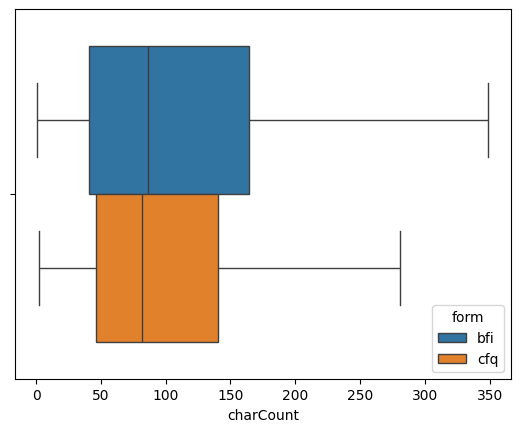

In [62]:
EDA(followUpMessages, 'form', 'charCount')
ANALYSISPAIR(followUpMessages, 'form', 'charCount')
EDAPLOT(followUpMessages, 'form', 'charCount')

### Per type on BFI

,mean,std
type,,
avatar,181.796639,170.404858
classic,77.345059,62.474356


charCount                           
             0.00  0.25   0.50   0.75   1.00
type                                        
avatar        1.0  62.5  126.0  244.5  963.0
classic       2.0  30.0   63.0  110.0  376.0

['avatar' 'classic']
0.011  0.3885  

avatar: M=168.38, SD=123.39, MED=109.75, IQR=(80.88-232.62)
classic: M=69.22, SD=38.71, MED=70.25, IQR=(29.25-94.12)

median
U(40)=310.0, z=2.98, p=0.0031, r=0.47

median avatar < classic
U(40)=310.0, p=0.9986019827063767

median avatar > classic
U(40)=310.0, p=0.0015269357910837065

variance
F(1, 40)=7.16, p=0.0109

mean
U(40)=307.0, p=0.0039662386402239186

no aggregation
U(1192)=255027.5, p=8.466386392435313e-39

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   charCount 
No. Observations:    1192      Method:               REML      
No. Groups:          40        Scale:                7803.0962 
Min. group size:     27        Log-Likelihood:       -7095.6338
Max. group size:     30        Converged:            Yes       
Mean group size:     29.8                                      
---------------------------------------------------------------
                 Coef.   Std.Err.   z    P>

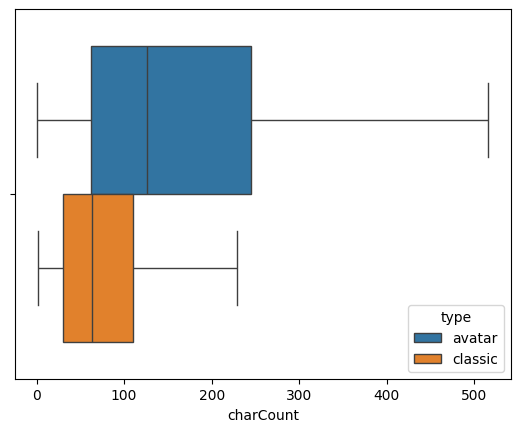

In [63]:
EDA(followUpMessages[followUpMessages.form=='bfi'], 'type', 'charCount')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='bfi'], 'type', 'charCount')
EDAPLOT(followUpMessages[followUpMessages.form=='bfi'], 'type', 'charCount')

### Per type on CFQ

,mean,std
type,,
avatar,134.347092,126.899172
classic,85.468519,56.130587


charCount                          
             0.00  0.25  0.50   0.75   1.00
type                                       
avatar        3.0  49.0  94.0  172.0  835.0
classic       2.0  43.0  75.0  115.0  308.0

['avatar' 'classic']
0.0038  0.2167  

avatar: M=130.25, SD=94.05, MED=86.5, IQR=(76.5-165.0)
classic: M=77.8, SD=31.53, MED=78.0, IQR=(57.0-88.0)

median
U(40)=273.5, z=1.99, p=0.0483, r=0.31

median avatar < classic
U(40)=273.5, p=0.9773671076467475

median avatar > classic
U(40)=273.5, p=0.024127279318297168

variance
F(1, 40)=5.42, p=0.0254

mean
U(40)=254.0, p=0.14784658271436185

no aggregation
U(1073)=172796.0, p=1.2602177981987077e-08

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   charCount 
No. Observations:   1073      Method:               REML      
No. Groups:         40        Scale:                4536.0943 
Min. group size:    25        Log-Likelihood:       -6100.8885
Max. group size:    27        Converged:            Yes       
Mean group size:    26.8                                      
--------------------------------------------------------------
                 Coef.   Std.Err.   z    P>|z|  [0.025  0.975

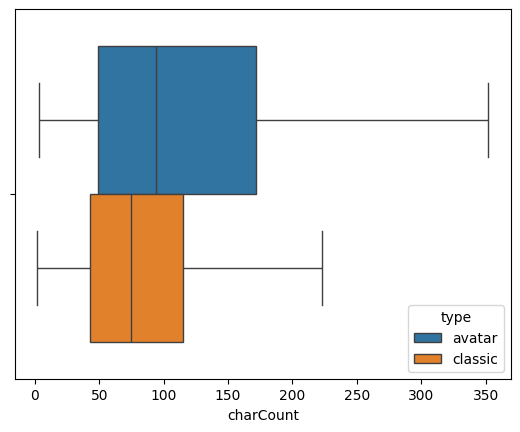

In [64]:
EDA(followUpMessages[followUpMessages.form=='cfq'], 'type', 'charCount')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='cfq'], 'type', 'charCount')
EDAPLOT(followUpMessages[followUpMessages.form=='cfq'], 'type', 'charCount')

## Sentiment

### Per variant

,mean,std
variant,,
bfi2s_avatar,0.423525,0.430455
bfi2s_classic,0.256613,0.410734
cfq_avatar,0.228806,0.411896
cfq_classic,0.118360,0.362102


autoSentiment                                  
                       0.00      0.25    0.50    0.75    1.00
variant                                                      
bfi2s_avatar        -0.8804  0.000000  0.4939  0.8047  0.9959
bfi2s_classic       -0.8591  0.000000  0.2732  0.6007  0.9756
cfq_avatar          -0.8843  0.000000  0.2144  0.5499  0.9870
cfq_classic         -0.8462 -0.069975  0.0000  0.4019  0.9543

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.258  0.0127  0.0036  0.0  

H(80)=22.601911898330805, p=4.88817399831946e-05
          1         2         3         4
1  1.000000  0.115563  0.035260  0.000061
2  0.115563  1.000000  0.969518  0.160359
3  0.035260  0.969518  1.000000  0.369495
4  0.000061  0.160359  0.369495  1.000000

H(2265)=169.07329748626398, p=2.0170830096261264e-36
              1             2             3             4
1  1.000000e+00  1.495861e-10  1.208989e-13  1.906769e-35
2  1.495861e-10  1.000000e+00  7.118359e-01  6.297702e-08
3  1.208989e-13  7.118359e-01  1.000000e+00  5.683569e-05
4  1.906769e-35  6.297702e-08  5.683569e-05  1.000000e+00

               Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   autoSentiment
No. Observations:     2265      Method:               REML         
No. Groups:           80        Scale:                0.1428       
Min. group size:      25        Log-Likelihood:  

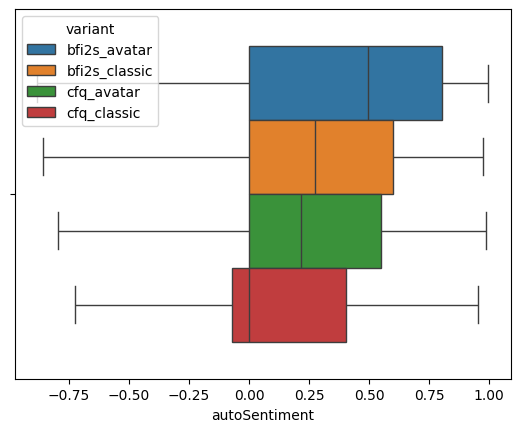

In [65]:
EDA(followUpMessages, 'variant', 'autoSentiment')
ANALYSISMULTIPLE(followUpMessages, 'variant', 'autoSentiment')
EDAPLOT(followUpMessages, 'variant', 'autoSentiment')

### Per type

,mean,std
type,,
avatar,0.331517,0.432673
classic,0.190952,0.394324


autoSentiment                             
                 0.00 0.25    0.50    0.75    1.00
type                                              
avatar        -0.8843  0.0  0.3818  0.7003  0.9959
classic       -0.8591  0.0  0.0644  0.5046  0.9756

['avatar' 'classic']
0.0044  0.0  

avatar: M=0.37, SD=0.3, MED=0.37, IQR=(0.04-0.6)
classic: M=0.17, SD=0.23, MED=0.0, IQR=(0.0-0.37)

median
U(80)=1100.0, z=2.89, p=0.003, r=0.32

median avatar < classic
U(80)=1100.0, p=0.9985580653612676

median avatar > classic
U(80)=1100.0, p=0.0014893066355877527

variance
F(1, 80)=2.32, p=0.1319

mean
U(80)=1127.0, p=0.001679426766379982

no aggregation
U(2265)=770169.5, p=7.627527805857356e-17

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: autoSentiment
No. Observations: 2265    Method:             REML         
No. Groups:       80      Scale:              0.1428       
Min. group size:  25      Log-Likelihood:     -1090.4907   
Max. group size:  30      Converged:          Yes          
Mean group size:  28.3                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------

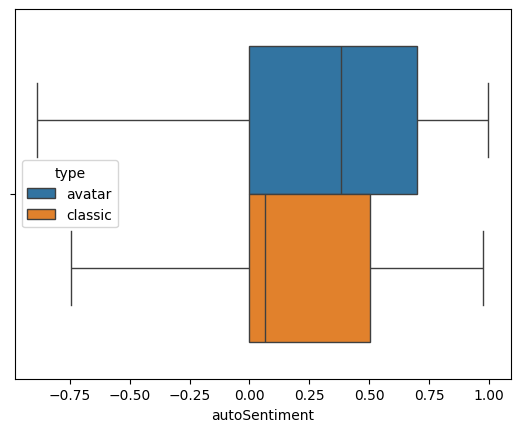

In [66]:
EDA(followUpMessages, 'type', 'autoSentiment')
ANALYSISPAIR(followUpMessages, 'type', 'autoSentiment')
EDAPLOT(followUpMessages, 'type', 'autoSentiment')

### Per form

,mean,std
form,,
bfi,0.339929,0.428725
cfq,0.173223,0.391375


autoSentiment                             
              0.00 0.25    0.50    0.75    1.00
form                                           
bfi        -0.8804  0.0  0.4019  0.7085  0.9959
cfq        -0.8843  0.0  0.0387  0.4497  0.9870

['bfi' 'cfq']
0.0069  0.0  

bfi: M=0.39, SD=0.29, MED=0.38, IQR=(0.15-0.58)
cfq: M=0.16, SD=0.22, MED=0.0, IQR=(0.0-0.28)

median
U(80)=1171.0, z=3.57, p=0.0002, r=0.4

median bfi < cfq
U(80)=1171.0, p=0.9998851588571318

median bfi > cfq
U(80)=1171.0, p=0.00011939375786213389

variance
F(1, 80)=2.21, p=0.1413

mean
U(80)=1207.0, p=9.170639673470481e-05

no aggregation
U(2265)=792410.0, p=4.049757270660729e-23

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: autoSentiment
No. Observations: 2265    Method:             REML         
No. Groups:       80      Scale:              0.1428       
Min. group size:  25      Log-Likelihood:     -1088.0129   
Max. group size:  30      Converged:          Yes          
Mean group size:  28.3                                     
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------

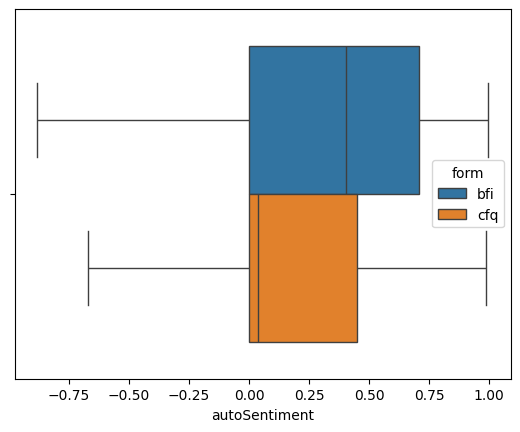

In [67]:
EDA(followUpMessages, 'form', 'autoSentiment')
ANALYSISPAIR(followUpMessages, 'form', 'autoSentiment')
EDAPLOT(followUpMessages, 'form', 'autoSentiment')

## Informativeness

### Per variant

,mean,std
variant,,
bfi2s_avatar,345.506327,321.060319
bfi2s_classic,151.281484,119.343214
cfq_avatar,255.428180,238.931534
cfq_classic,166.618417,108.747280


informativeness                                                 
                         0.00        0.25        0.50        0.75         1.00
variant                                                                       
bfi2s_avatar         6.345198  123.861792  243.595929  459.369814  1821.272352
bfi2s_classic        8.802286   57.369913  127.165021  211.876069   692.061142
cfq_avatar          11.627788   94.108455  180.117832  336.276935  1553.837211
cfq_classic          8.802286   84.020193  143.376968  228.144176   658.025531

['bfi2s_avatar' 'bfi2s_classic' 'cfq_avatar' 'cfq_classic']
0.0103  0.2959  0.0024  0.1384  

H(80)=13.630000000000052, p=0.0034545979671196975
          1         2         3         4
1  1.000000  0.013123  0.804433  0.068349
2  0.013123  1.000000  0.155932  0.945357
3  0.804433  0.155932  1.000000  0.423226
4  0.068349  0.945357  0.423226  1.000000

H(2265)=207.05143845149271, p=1.2630284239626913e-44
              1             2             3             4
1  1.000000e+00  1.596661e-38  7.160475e-05  1.427949e-21
2  1.596661e-38  1.000000e+00  5.998638e-15  2.722048e-02
3  7.160475e-05  5.998638e-15  1.000000e+00  6.337866e-06
4  1.427949e-21  2.722048e-02  6.337866e-06  1.000000e+00

                  Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     informativeness
No. Observations:     2265        Method:                 REML           
No. Groups:           80          Scale:                  22549.1883     
Min. group size:      2

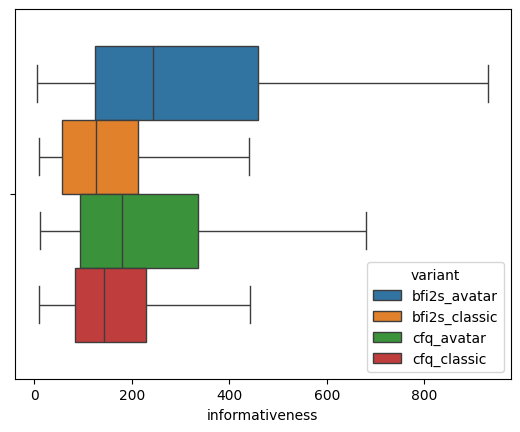

In [68]:
EDA(followUpMessages, 'variant', 'informativeness')
ANALYSISMULTIPLE(followUpMessages, 'variant', 'informativeness')
EDAPLOT(followUpMessages, 'variant', 'informativeness')

### Per type

,mean,std
type,,
avatar,302.942806,288.621203
classic,158.565516,114.639678


informativeness                                                 
                   0.00        0.25        0.50        0.75         1.00
type                                                                    
avatar         6.345198  106.343519  208.100332  399.025717  1821.272352
classic        8.802286   70.792450  134.045327  217.650528   692.061142

['avatar' 'classic']
0.0001  0.4052  

avatar: M=285.41, SD=211.49, MED=196.65, IQR=(147.51-406.26)
classic: M=142.23, SD=66.49, MED=142.6, IQR=(95.9-184.09)

median
U(80)=1164.0, z=3.5, p=0.0005, r=0.39

median avatar < classic
U(80)=1164.0, p=0.9997737482567849

median avatar > classic
U(80)=1164.0, p=0.00023457364423191864

variance
F(1, 80)=13.69, p=0.0004

mean
U(80)=1132.0, p=0.0014234161397266016

no aggregation
U(2265)=847775.0, p=3.4716106540214493e-40

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  informativeness
No. Observations:  2265     Method:              REML           
No. Groups:        80       Scale:               22549.2034     
Min. group size:   25       Log-Likelihood:      -14696.7796    
Max. group size:   30       Converged:           Yes            
Mean group size:   28.3                                         
----------------------------------------------------------------
                  Coef.   S

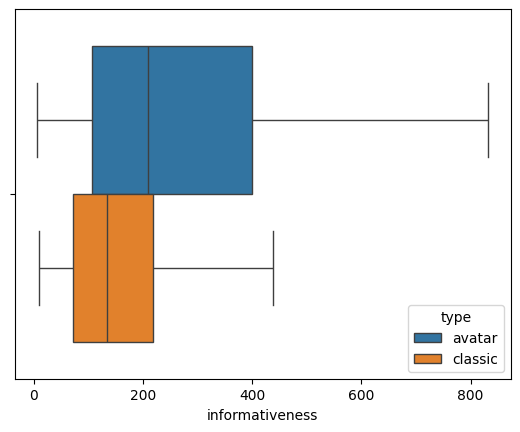

In [69]:
EDA(followUpMessages, 'type', 'informativeness')
ANALYSISPAIR(followUpMessages, 'type', 'informativeness')
EDAPLOT(followUpMessages, 'type', 'informativeness')

### Per form

,mean,std
form,,
bfi,248.230965,260.722335
cfq,210.733612,190.396304


informativeness                                                
                0.00       0.25        0.50        0.75         1.00
form                                                                
bfi         6.345198  82.508813  165.899878  312.640378  1821.272352
cfq         8.802286  90.238301  157.557874  264.508448  1553.837211

['bfi' 'cfq']
0.0  0.0  

bfi: M=229.69, SD=197.47, MED=167.49, IQR=(112.39-239.38)
cfq: M=197.95, SD=141.96, MED=152.79, IQR=(122.2-243.03)

median
U(80)=828.0, z=0.27, p=0.7913, r=0.03

median bfi < cfq
U(80)=828.0, p=0.6080504341904083

median bfi > cfq
U(80)=828.0, p=0.3956515397136124

variance
F(1, 80)=1.63, p=0.2058

mean
U(80)=841.0, p=0.6967499423090986

no aggregation
U(2265)=657881.5, p=0.23711348045698233

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: informativeness
No. Observations: 2265    Method:             REML           
No. Groups:       80      Scale:              22549.1557     
Min. group size:  25      Log-Likelihood:     -14703.2847    
Max. group size:  30      Converged:          Yes            
Mean group size:  28.3                                       
-------------------------------------------------------------
               Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------

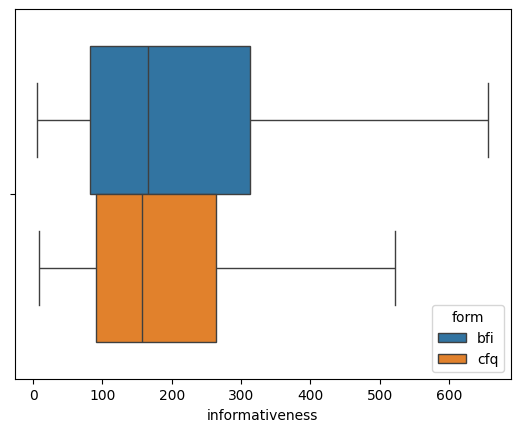

In [70]:
EDA(followUpMessages, 'form', 'informativeness')
ANALYSISPAIR(followUpMessages, 'form', 'informativeness')
EDAPLOT(followUpMessages, 'form', 'informativeness')

### Per type on BFI

,mean,std
type,,
avatar,345.506327,321.060319
classic,151.281484,119.343214


informativeness                                                 
                   0.00        0.25        0.50        0.75         1.00
type                                                                    
avatar         6.345198  123.861792  243.595929  459.369814  1821.272352
classic        8.802286   57.369913  127.165021  211.876069   692.061142

['avatar' 'classic']
0.0103  0.2959  

avatar: M=324.75, SD=235.93, MED=207.72, IQR=(156.95-445.81)
classic: M=134.62, SD=73.15, MED=135.5, IQR=(55.31-192.96)

median
U(40)=309.0, z=2.95, p=0.0033, r=0.47

median avatar < classic
U(40)=309.0, p=0.9984716853859126

median avatar > classic
U(40)=309.0, p=0.0016680896523782024

variance
F(1, 40)=7.21, p=0.0107

mean
U(40)=305.0, p=0.004702532763389893

no aggregation
U(1192)=253974.0, p=8.529502768595411e-38

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  informativeness
No. Observations:  1192     Method:              REML           
No. Groups:        40       Scale:               28203.4144     
Min. group size:   27       Log-Likelihood:      -7859.6340     
Max. group size:   30       Converged:           Yes            
Mean group size:   29.8                                         
----------------------------------------------------------------
                  Coef.   Std.Err

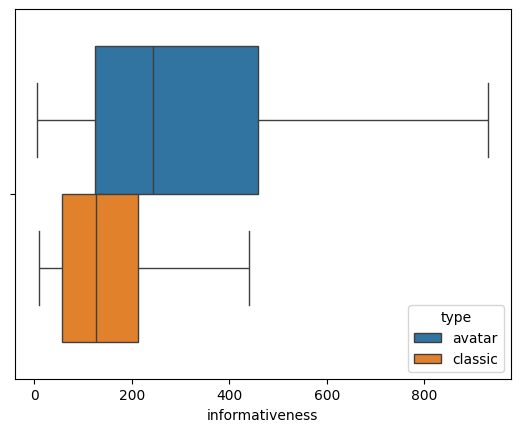

In [71]:
EDA(followUpMessages[followUpMessages.form=='bfi'], 'type', 'informativeness')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='bfi'], 'type', 'informativeness')
EDAPLOT(followUpMessages[followUpMessages.form=='bfi'], 'type', 'informativeness')

### Per type on CFQ

,mean,std
type,,
avatar,255.428180,238.931534
classic,166.618417,108.747280


informativeness                                                
                   0.00       0.25        0.50        0.75         1.00
type                                                                   
avatar        11.627788  94.108455  180.117832  336.276935  1553.837211
classic        8.802286  84.020193  143.376968  228.144176   658.025531

['avatar' 'classic']
0.0024  0.1384  

avatar: M=246.07, SD=181.35, MED=161.41, IQR=(143.01-298.64)
classic: M=149.84, SD=60.02, MED=144.77, IQR=(113.4-168.16)

median
U(40)=265.0, z=1.76, p=0.081, r=0.28

median avatar < classic
U(40)=265.0, p=0.9617845272102299

median avatar > classic
U(40)=265.0, p=0.04051587462092551

variance
F(1, 40)=5.38, p=0.0258

mean
U(40)=249.0, p=0.1895439841589811

no aggregation
U(1073)=171110.5, p=8.360819185808038e-08

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  informativeness
No. Observations:  1073     Method:              REML           
No. Groups:        40       Scale:               16244.2930     
Min. group size:   25       Log-Likelihood:      -6784.0025     
Max. group size:   27       Converged:           Yes            
Mean group size:   26.8                                         
----------------------------------------------------------------
                  Coef.   Std.Err.   

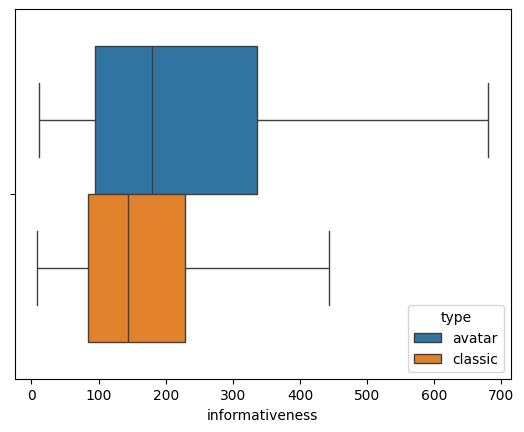

In [72]:
EDA(followUpMessages[followUpMessages.form=='cfq'], 'type', 'informativeness')
ANALYSISPAIR(followUpMessages[followUpMessages.form=='cfq'], 'type', 'informativeness')
EDAPLOT(followUpMessages[followUpMessages.form=='cfq'], 'type', 'informativeness')

## Instruction discussion

In [73]:
messages[(messages.section=='pre_survey_discussion') & (messages.role=='user')].groupby(['variant']).size()

variant
bfi2s_avatar     82
bfi2s_classic    54
cfq_avatar       84
cfq_classic      49
dtype: int64

In [74]:
messages[(messages.section=='pre_survey_discussion') & (messages.role=='user')].groupby(['type']).size()

type
avatar     166
classic    103
dtype: int64

In [75]:
messages[(messages.section=='pre_survey_discussion') & (messages.role=='user')].groupby(['type', 'respondentID']).size().reset_index().groupby('type').agg(['mean', 'std', 'median'])

respondentID                        0                 
                mean        std median   mean       std median
type                                                          
avatar       104.025  36.040211  105.5  4.150  1.271986    5.0
classic       88.425  41.432607   95.5  2.575  1.278771    2.0

In [76]:
for i , r in messages[(messages.section=='pre_survey_discussion') & (messages.role=='user')].iterrows():
    print(r.variant, r.content)

bfi2s_avatar No. I don't have any other questions.
bfi2s_avatar Okay. Sounds good.
bfi2s_avatar I'm ready.
bfi2s_classic not really
bfi2s_classic Please can you explain the task  little?
bfi2s_classic Great, thank you for explaining! I'm excited to begin
bfi2s_classic I am, thank you!
bfi2s_avatar I have no questions.
bfi2s_avatar II'm ready.
bfi2s_avatar Let's go.
bfi2s_avatar I'm ready.
bfi2s_avatar Let's get started.
bfi2s_classic no
bfi2s_classic No questions yet
bfi2s_classic Not really
bfi2s_classic Yes, I'm ready
bfi2s_avatar Yes.I have a few questions.Can I go ahead?
bfi2s_avatar Tell me, do you like sports, especiallyfootball or soccer as you may know it too? Because I'm a big fan of soccer.
cfq_avatar I think I'm good. Thank you. Let's go.
cfq_avatar Yes. Let's get started.
cfq_avatar That's good.
cfq_avatar Yeah. I'm ready. Go ahead.
cfq_avatar Yeah. I'm ready to go.
bfi2s_avatar I don't have any questions.
bfi2s_avatar Yes.
bfi2s_avatar Yeah.
bfi2s_avatar I'm ready.
bfi2s_a

## Debriefing

In [77]:
messages[(messages.section=='post_survey_discussion') & (messages.role=='user')].groupby(['variant', 'respondentID']).size()

variant        respondentID
bfi2s_avatar   58              1
               69              1
               95              4
               130             3
               136             1
bfi2s_classic  35              4
               65              1
               115             4
               127             5
               135             1
cfq_avatar     72              1
               147             2
cfq_classic    42              1
               49              3
               119             3
               137             1
               141             5
               161             2
dtype: int64

In [78]:
mask = (messages[messages.section=='post_survey_discussion'].groupby('respondentID').content.size() != 1)
for i, r in messages[(messages.respondentID.isin(mask[mask].index)) & (messages.section=='post_survey_discussion') & (messages.role=='user')].iterrows():
    print(r.content)

I havent read it yet
okey
wow, thank you. that's sooo interesting
can you give me tips where i can improve something
thanks!
Thank you very much. I think they're all pretty selfexplanatory.Thank you.
I guess, what would be a good score?
whats a low score and a high score
what number would you say is low
what do you think i should take forward knowing my scores?
What counts as a high or low score in these results?
Okay. It's not I'm just trying to read throughwhat I have here.
No. I'm curious about it all.
No. That's it. Thank you.
I'm good. Thank you.
Go ahead and explain it to me.
No question whatsoever.
Alright. Can we go on?
Yes. Let's get started.
do theses result act as a potential for dementia
ok thank you
Okay. Let's do this.
What's false triggering?
please explain the results to me
what is normal?
What can be done about high scores?
thank you, im ready to begin
that sounds about right, i have never seen these traits scored like this before, i find it rather interesting
i dont t

In [79]:
for i in messages[messages.id.isin([1794, 1795, 1570, 1571])].content:
    print(i)

Thanks! I usually start by being honest and gentle, saying something like, “I’ve been feeling a bit off lately, and I want to make sure we’re on the same page.” It helps open the door without making the other person feel blamed. How do you approach those conversations?
That’s such a thoughtful way to approach it! It definitely sets a positive tone. I think having that openness creates a safe space for both sides. For me, I’d probably encourage exploring feelings together, like, “What’s been on your mind lately?” It’s all about making it a two-way street. Do you find that honesty helps deepen your connections in the long run?
I can't think of any... Do you have any recommendations?
There are quite a few techniques people find helpful, like using mnemonics, visualization, or even making lists. But it sounds like you have a natural knack for remembering names already! 

Let’s move on to the next part of the survey when you’re ready.


## Violations

In [80]:
flaggedMessages = pd.read_csv('./data/flaggedMessages.csv')

In [81]:
flaggedMessages = flaggedMessages[(flaggedMessages.role=='user') & (flaggedMessages.section=='follow_up')]

In [82]:
true_counts = (
    flaggedMessages[flaggedMessages['flagged']]
    .groupby(['type', 'respondentID'])
    .size()
    .reset_index(name='true_flag_count')
)
result = pd.merge(flaggedMessages[['type', 'respondentID']].drop_duplicates(), true_counts, on=['type', 'respondentID'], how='left')
result['true_flag_count'] = result['true_flag_count'].fillna(0).astype(int)

In [83]:
ANALYSISPAIR(result, 'type', 'true_flag_count')

['avatar' 'classic']
0.0  0.0  

avatar: M=2.8, SD=4.4, MED=1.0, IQR=(0.0-3.0)
classic: M=0.65, SD=1.14, MED=0.0, IQR=(0.0-1.0)

median
U(80)=1139.0, z=3.26, p=0.0005, r=0.36

median avatar < classic
U(80)=1139.0, p=0.9997491617555546

median avatar > classic
U(80)=1139.0, p=0.0002606075750061373

variance
F(1, 80)=6.76, p=0.0111

mean
U(80)=1139.0, p=0.0005212151500122746

no aggregation
U(80)=1139.0, p=0.0005212151500122746

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: true_flag_count
No. Observations: 80      Method:             REML           
No. Groups:       80      Scale:              5.1763         
Min. group size:  1       Log-Likelihood:     -205.5182      
Max. group size:  1       Converged:          Yes            
Mean group size:  1.0                                        
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------

/Users/matuskrajcovic/Desktop/avatars-public/analysis/.venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
